# Predecir la calidad del Vino blanco

En este estudio analizaremos la calidad del vino blanco mediante factores propios del vino como el PH, análisis de azúcar y oxígeno realizados al vino para determinar que tan bueno es dicho vino en una puntuación de 0 a 10. Las muestra de entrenamiento fueron recolectadas de https://archive.ics.uci.edu/ml/datasets/Wine+Quality.

Trabajaremos este estudio mediante las librerías de Pandas para la adquisición y preprocesamiento de datos, Keras para el análisis y aprendizaje y Matplotlib para la graficación.

## Fase de Adquisición de datos

In [2]:
import pandas as pd

url = "http://badillosoft.com/winequality-white.csv"

df = pd.read_csv(url, sep=";")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [3]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

## Fase de inspección de datos

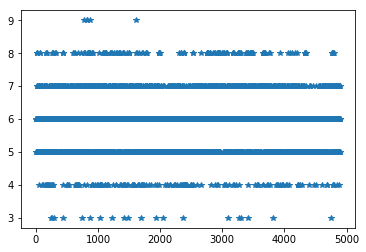

In [6]:
import matplotlib.pyplot as plt

plt.plot(df["quality"].index, df["quality"], "*")

plt.show()

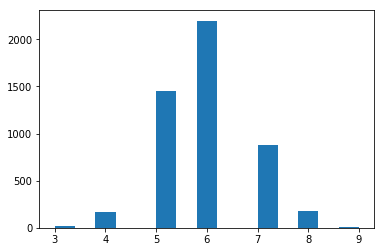

In [10]:
plt.hist(df["quality"], 15)

plt.show()

## Fase de Entrenamiento

In [11]:
# Definimos k como el número de muestras utilizas para el entrenamiento
n = len(df)
k = int(n * 0.9)

print("Se utilizarán {}/{} muestras para el entrenamiento".format(k, n))

Se utilizarán 4408/4898 muestras para el entrenamiento


In [14]:
x_columns = ["fixed acidity", "volatile acidity", 
             "citric acid", "residual sugar",
            "chlorides", "free sulfur dioxide",
            "total sulfur dioxide", "density",
            "pH", "sulphates", "alcohol"]

x = pd.DataFrame(df, columns=x_columns)

x_train = x[:k].values # [0 -> k - 1] |k| 90%
x_test = x[k:].values # [k -> n - 1] |n - k| 10%

print("Muestras de entrenamiento (características)")
print(x_train)
print("Muestras de validación (características)")
print(x_test)

Muestras de entrenamiento
[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 5.9   0.29  0.16 ...  3.21  0.36  9.4 ]
 [ 6.3   0.29  0.29 ...  3.17  0.36 12.8 ]
 [ 6.3   0.19  0.32 ...  2.92  0.47 11.05]]
Muestras de validación
[[ 5.7         0.29        0.16       ...  3.21        0.36
   9.4       ]
 [ 6.3         0.29        0.29       ...  3.17        0.36
  12.8       ]
 [ 5.7         0.24        0.47       ...  3.11        0.46
   9.73333333]
 ...
 [ 6.5         0.24        0.19       ...  2.99        0.46
   9.4       ]
 [ 5.5         0.29        0.3        ...  3.34        0.38
  12.8       ]
 [ 6.          0.21        0.38       ...  3.26        0.32
  11.8       ]]


In [18]:
y = df["quality"]

y_train = y[:k].values
y_test = y[k:].values

print("Muestras de entrenamiento (objetivos)")
print(y_train)
print("Muestras de validación (objetivos)")
print(y_test)

Muestras de entrenamiento (objetivos)
[6 6 6 ... 5 7 6]
Muestras de validación (objetivos)
[5 7 5 7 7 7 7 5 5 6 6 6 6 6 6 6 6 6 6 5 6 6 5 6 6 5 6 6 6 6 5 5 5 6 5 5 6
 6 6 6 5 6 6 5 5 6 6 5 5 5 7 5 6 6 6 6 5 5 5 5 6 6 6 6 5 5 6 6 6 5 5 5 5 5
 6 4 5 6 6 6 6 6 6 6 6 6 6 6 6 5 5 6 6 6 6 7 5 5 6 5 4 5 6 6 6 6 5 6 6 6 6
 6 5 5 6 5 6 6 6 6 6 6 6 6 6 5 6 6 6 5 6 5 6 6 5 5 6 6 6 6 5 5 6 6 6 6 6 5
 5 6 6 7 6 6 7 7 7 5 5 5 6 6 6 7 7 6 7 7 5 6 7 6 6 6 6 6 6 6 6 6 5 6 6 6 6
 6 6 6 6 6 6 7 6 6 6 6 6 6 5 6 7 4 6 5 5 5 5 7 5 7 7 5 6 7 7 6 6 5 6 6 6 7
 7 7 6 6 6 6 5 6 5 6 6 6 7 6 6 7 7 7 5 5 5 7 5 7 7 7 7 7 6 6 6 5 6 7 7 6 5
 7 7 5 6 5 5 7 7 6 6 7 6 5 4 6 6 6 6 5 4 6 6 6 6 7 5 6 7 7 6 7 6 5 5 6 6 7
 6 6 7 6 6 6 7 6 6 6 7 6 6 6 6 6 5 6 6 6 6 6 6 6 6 5 5 6 6 6 6 6 6 7 6 6 5
 6 6 5 5 3 6 6 5 6 5 6 7 6 6 6 7 7 6 6 6 6 7 7 6 8 8 7 6 6 6 6 5 7 4 6 6 6
 6 4 5 5 6 6 5 7 8 8 5 6 6 6 6 6 5 7 7 6 5 6 7 7 8 7 4 6 6 6 5 6 5 6 7 5 6
 7 6 6 6 6 5 6 6 7 5 6 6 6 5 7 6 6 5 6 7 6 5 6 6 4 7 6 6 5 6 5 6 7 6 5 6 5
 5 5 6 6 

In [24]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=6, activation="tanh", input_dim=11))
model.add(Dense(units=1, activation="relu"))
# 11 -> 6 -> 1

model.compile(optimizer="adam", loss="mse",
              metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
4408/4408 [==============================] - 1s 117us/step - loss: 16.2459 - acc: 0.0000e+00
Epoch 2/50
4408/4408 [==============================] - 0s 42us/step - loss: 12.3240 - acc: 0.0014
Epoch 3/50
4408/4408 [==============================] - 0s 42us/step - loss: 9.4939 - acc: 0.0043
Epoch 4/50
4408/4408 [==============================] - 0s 42us/step - loss: 7.2854 - acc: 0.0066
Epoch 5/50
4408/4408 [==============================] - 0s 37us/step - loss: 5.5446 - acc: 0.0343
Epoch 6/50
4408/4408 [==============================] - 0s 29us/step - loss: 4.2014 - acc: 0.0345
Epoch 7/50
4408/4408 [==============================] - 0s 44us/step - loss: 3.1855 - acc: 0.0345
Epoch 8/50
4408/4408 [==============================] - 0s 34us/step - loss: 2.4324 - acc: 0.2838
Epoch 9/50
4408/4408 [==============================] - 0s 60us/step - loss: 1.8901 - acc: 0.3040
Epoch 10/50
4408/4408 [==============================] - 0s 53us/step - loss: 1.5102 - acc: 0.3040
Epoch 11/50
